##### Algorithmics for Data Mining Project 1
# Exploratory Data Analysis
###### Darryl Abraham, add name here

## Libraries

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.covariance import EllipticEnvelope

## Data import

In [80]:
df = pd.read_csv('data/spotifydata.csv')

## Data Overview

In [17]:
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Univariate Analysis

In [57]:
# Descriptive statistics
df.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

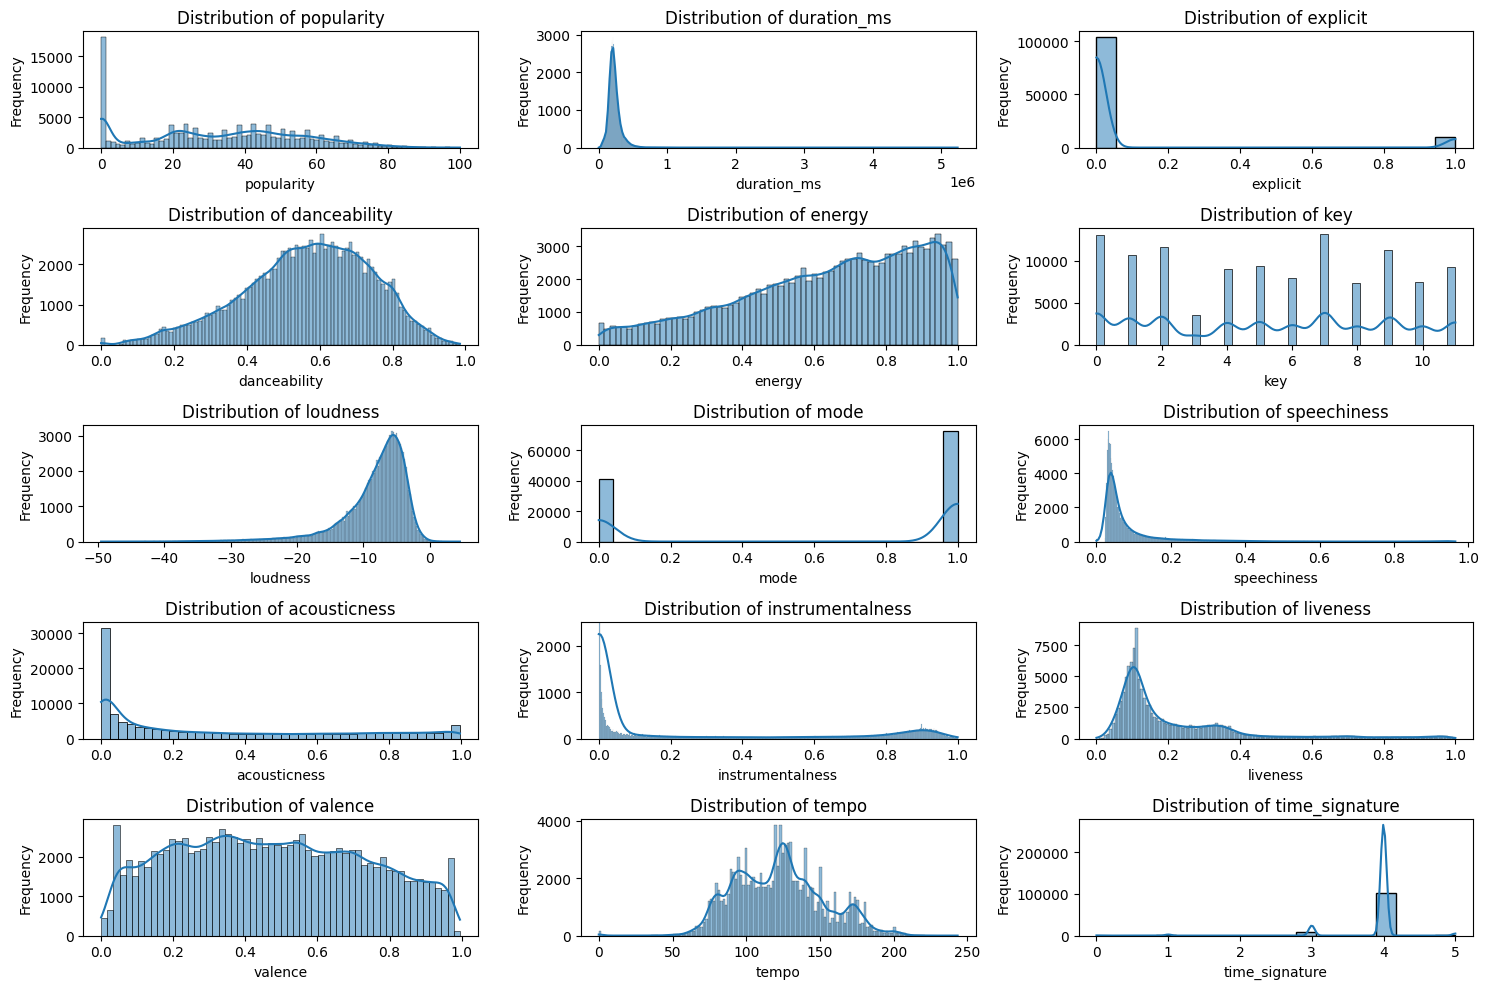

In [58]:
# Distributions
columns_to_skip = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre']
columns_to_plot = [col for col in df.columns if col not in columns_to_skip]

num_rows = 5  
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    if col not in columns_to_skip:
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    if col == 'instrumentalness':
        axes[i].set_ylim(0, 2500)

# Adjust layout
plt.tight_layout()
plt.show()

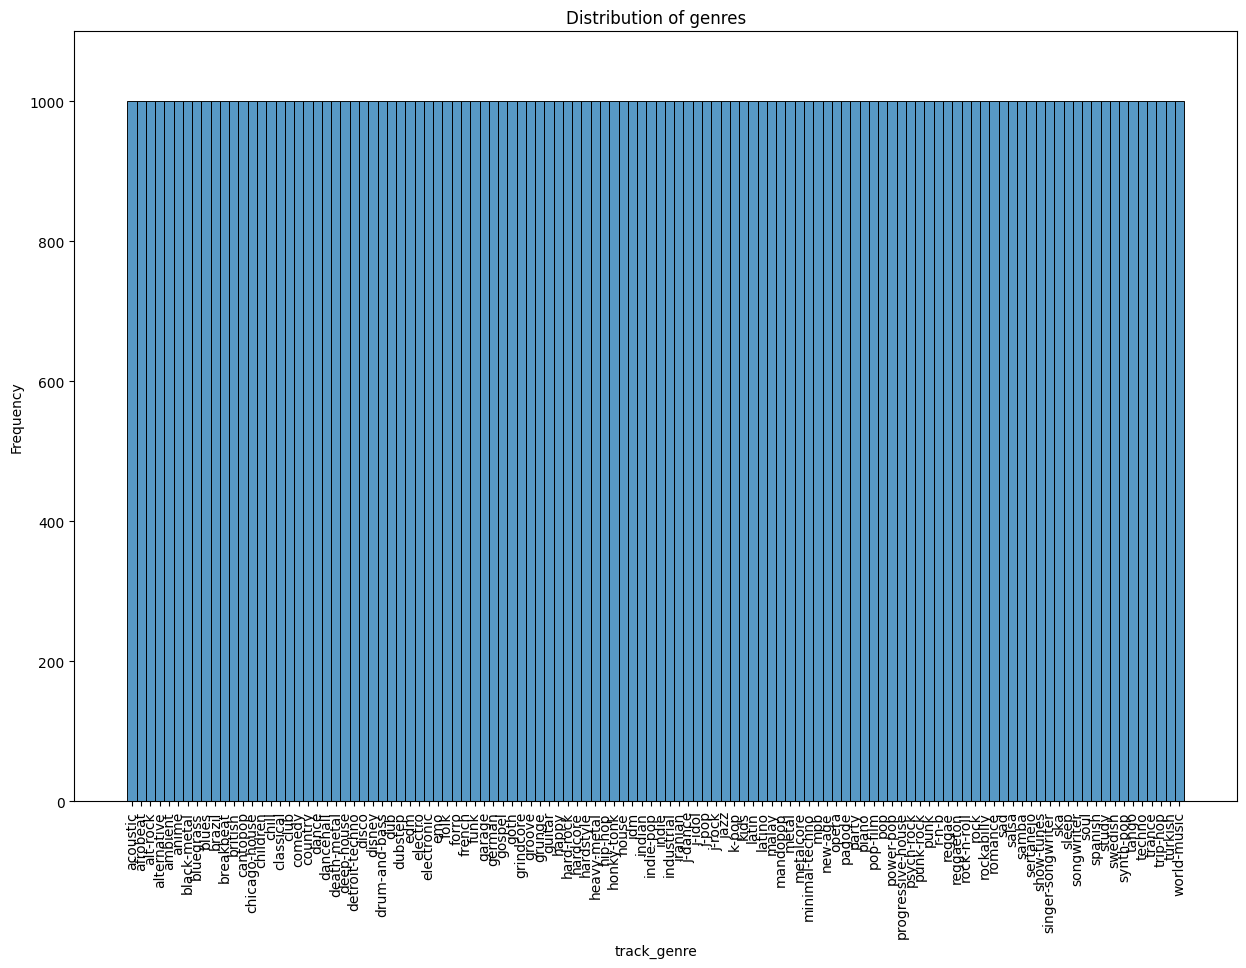

In [55]:
# Histogram of genres
plt.figure(figsize=(15, 10))
sns.histplot(df['track_genre'], kde=False)
plt.title('Distribution of genres')
plt.xlabel('track_genre')
plt.ylabel('Frequency')
plt.ylim(0, 1100)
plt.xticks(rotation=90)
plt.show()

In [84]:
# Most published artists
#df['artists'] = df['artists'].str.split(';')
#df_artist = df.explode('artists')
df_artist = df['artists'].value_counts()
df_artist.head(10)

artists
[The Beatles]        279
[George Jones]       271
[Stevie Wonder]      236
[Linkin Park]        224
[Ella Fitzgerald]    222
[Prateek Kuhad]      217
[Feid]               202
[Chuck Berry]        190
[Håkan Hellström]    183
[OneRepublic]        181
Name: count, dtype: int64

## Multivariate Analysis

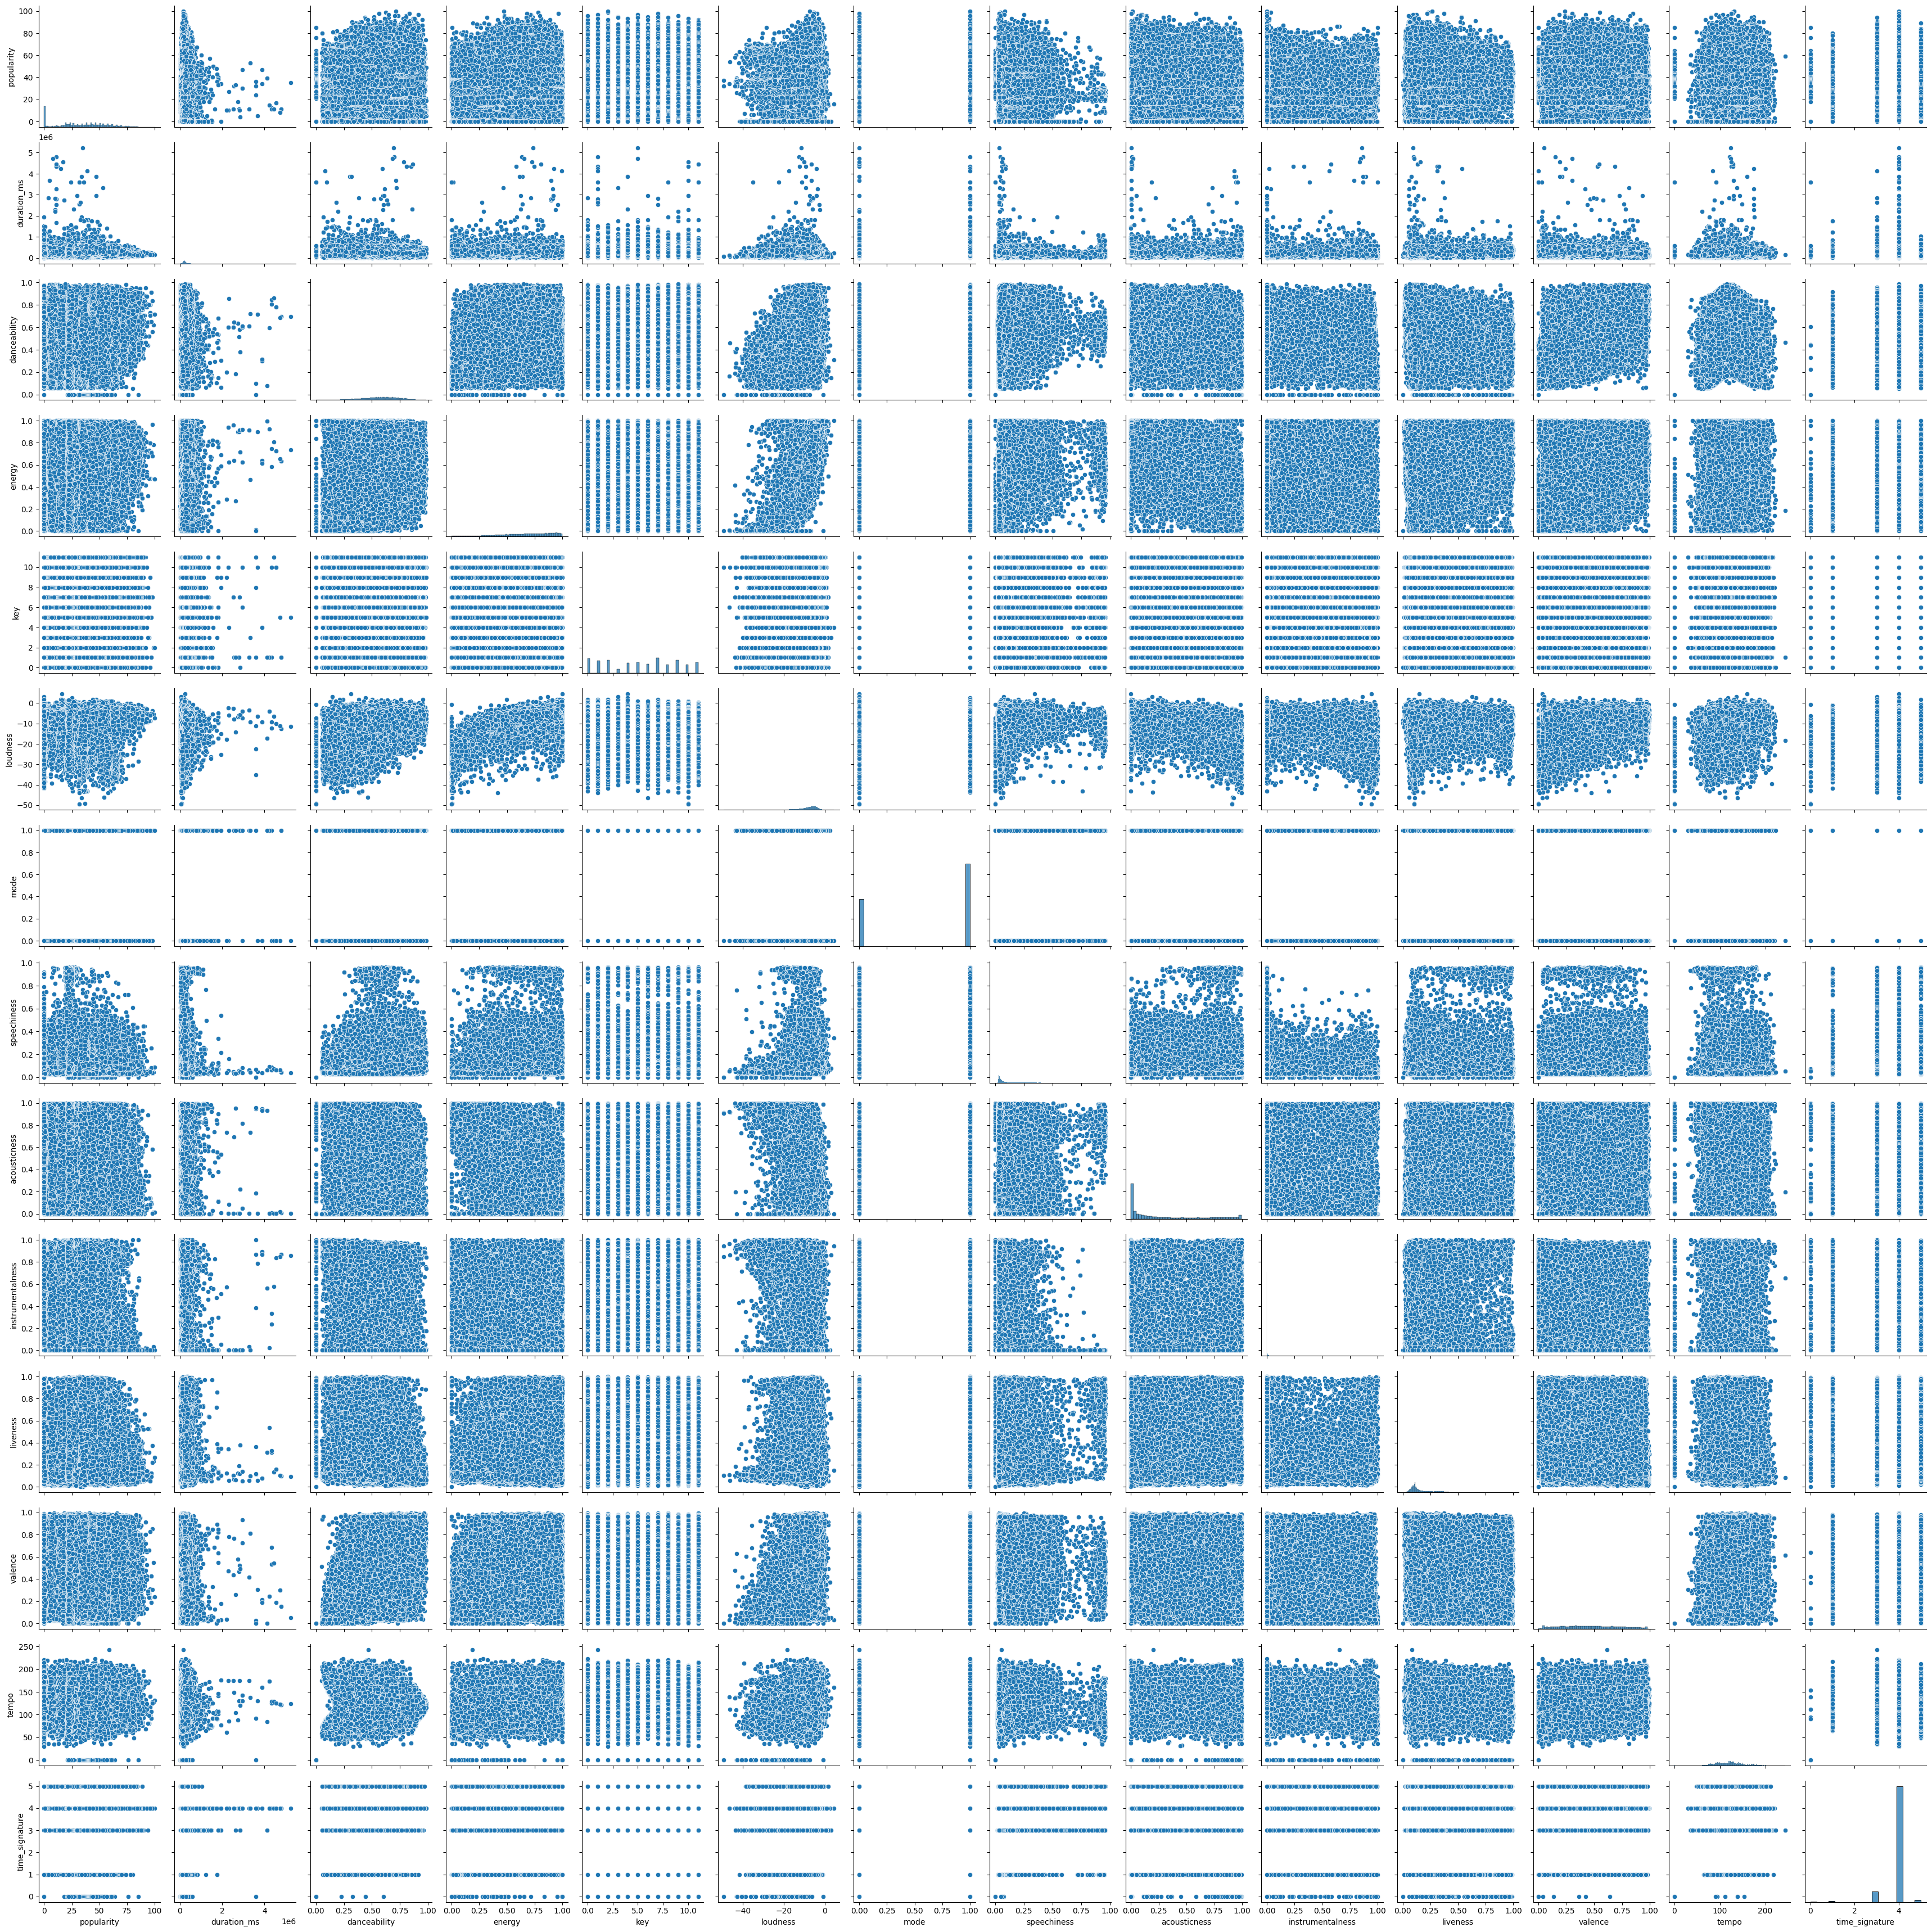

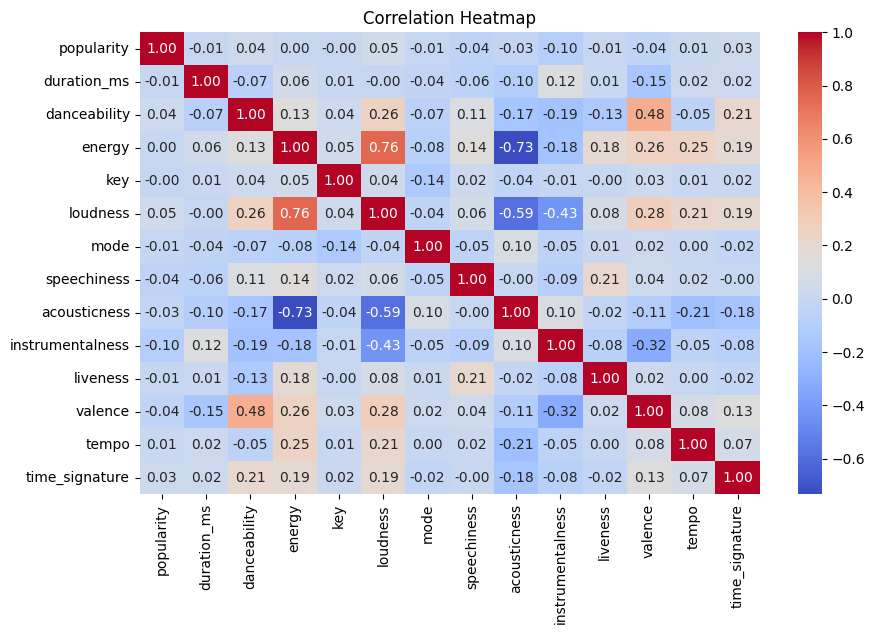

In [89]:
# get numerical columns
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num = df_num.drop(columns=['Unnamed: 0'])
sns.pairplot(df_num)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Outlier Detection

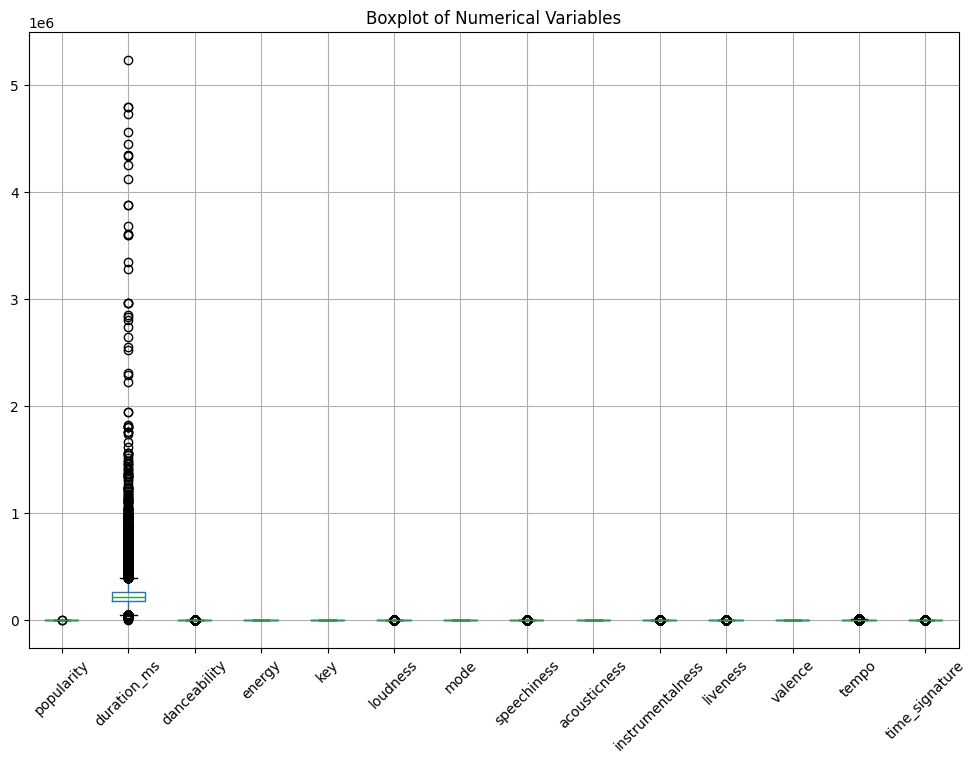

In [90]:
# Visualizing outliers
numerical_cols = df_num.columns
plt.figure(figsize=(12, 8))
df[numerical_cols].boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

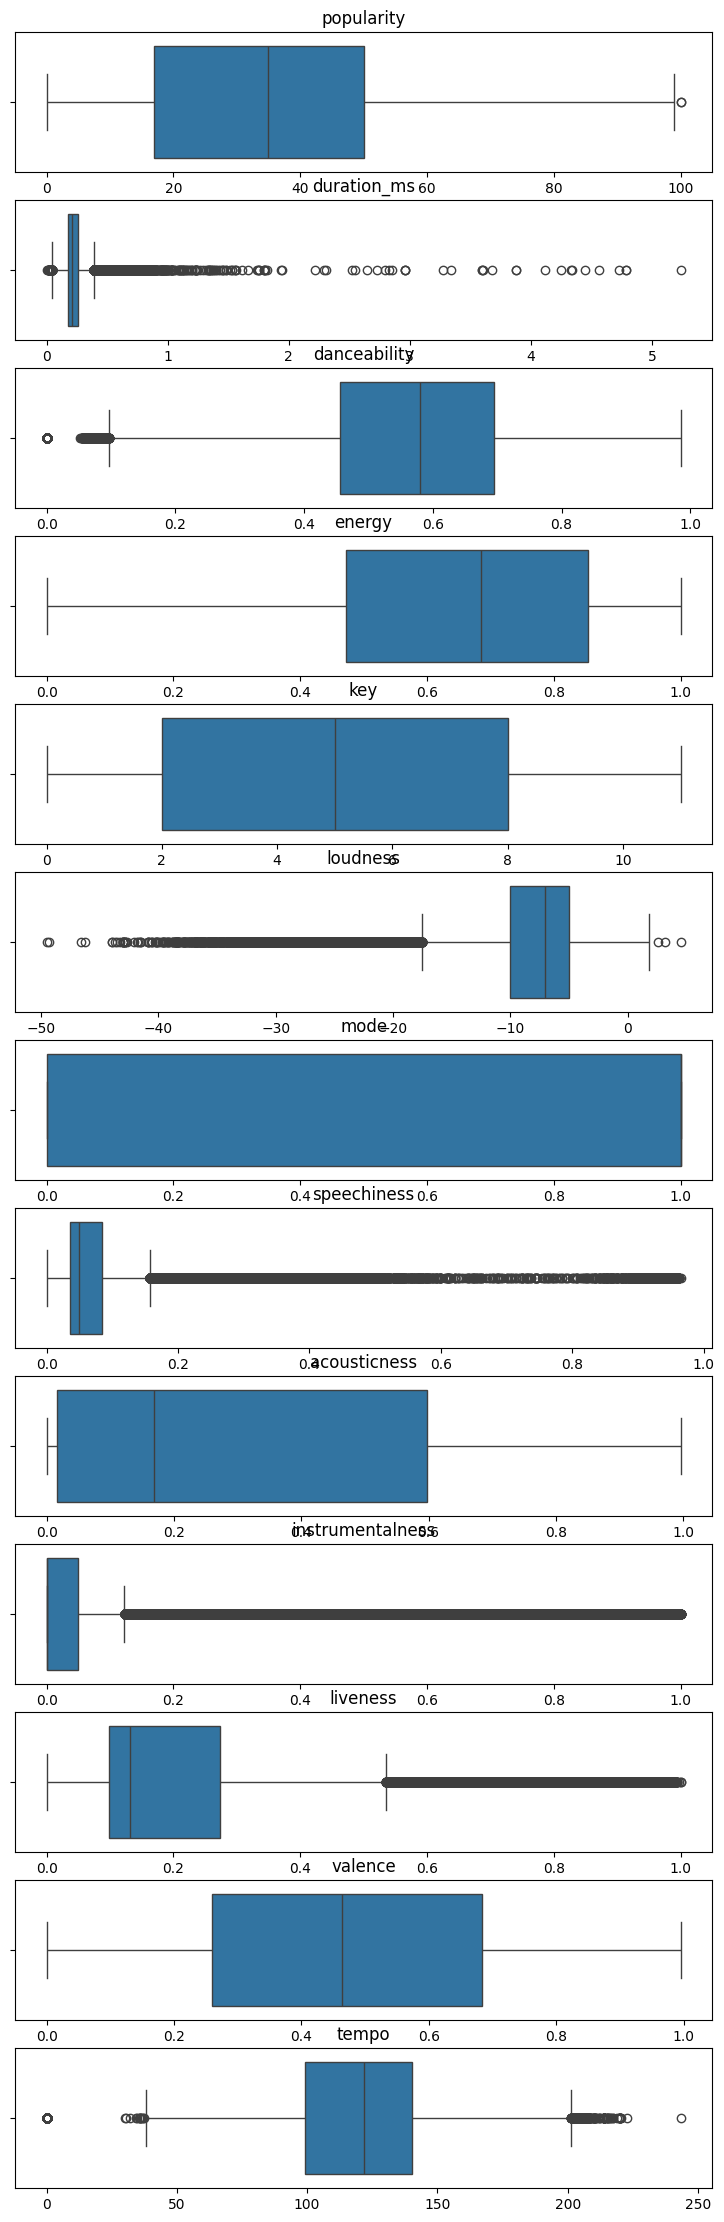

In [106]:
# Visualizing outliers
fig, axes = plt.subplots(nrows=len(numerical_cols)-1, ncols=1, figsize=(9, 2 * len(numerical_cols)))

# Plot boxplots for each numerical variable on its respective subplot
for i, col in enumerate(df_num.columns):
    if col == 'time_signature':
        continue
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.show()

In [92]:
# By Z-score
z_scores = stats.zscore(df[numerical_cols])
abs_z_scores = np.abs(z_scores)
outlier_rows_z= np.where(abs_z_scores > 3)[0]

# By IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_rows_iqr = df[((df[numerical_cols] < (Q1 - 3 * IQR)) | (df[numerical_cols] > (Q3 + 3 * IQR))).any(axis=1)].index

In [95]:
# Multivariate outlier detection
# Elliptic Envelope
outlier_detector = EllipticEnvelope(contamination=0.05)  # Adjust contamination based on expected proportion of outliers
outlier_detector.fit(df[numerical_cols])
outliers = outlier_detector.predict(df[numerical_cols])
mv_outlier_rows = df[outliers == -1].index

C:\Users\darry\Documents\MDS\Y1_S2\Algorithmics_For_Data_Mining\adm\.venv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (2.424805942123840 > -3.794338838484309). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\darry\Documents\MDS\Y1_S2\Algorithmics_For_Data_Mining\adm\.venv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (2.507516155896492 > -4.199881839062998). You may want to try with a higher value of support_fraction (current value: 0.500).
  warnings.warn(
C:\Users\darry\Documents\MDS\Y1_S2\Algorithmics_For_Data_Mining\adm\.venv\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (2.520039413

In [ ]:
# Handle outliers
# Removal
#clean_df = df.drop(outlier_rows_z)
#clean_df = clean_df.drop(outlier_rows_iqr)
#clean_df = clean_df.drop(mv_outlier_rows)